# Influenza Forecasting Using Python

Course: MBIO-4783 Python for Data Analytics\
Authors: Maysara AlShareef, Rami Hassan, & Jaydon Lam\
Project Team 4

## Table of Contents
* [Import Libraries](#zero)
* [Flu Disease Burden](#one)
* [Flu Hospitalizations and Deaths](#two)
* [Flu Hospitalizations by Race](#three)
* [Flu Vaccine Coverage](#four)
* [Flu Pandemic Simulation](#five)

<a name="zero"></a> 
# Import Libraries
Run this cell first in order to properly run all subsequent cells.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
import seaborn as sns

<a name="one"></a> 
## Flu Disease Burden

This section plots the disease burden of influenza from the flu seasons of 2010-11 through 2019-20.\
From this we can see the morbidity of influenza as well as number of medical visits, hospitalizations, and deaths.

<Figure size 1000x800 with 0 Axes>

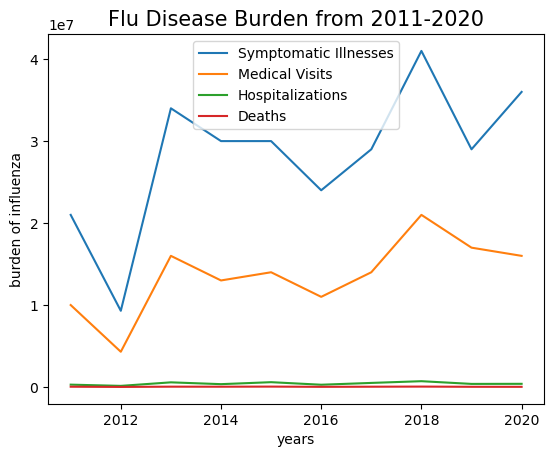

In [13]:
df = pd.read_csv('disease_burden.csv')
df.set_index('years', inplace=True)
years = list(map(str, range(2011,2021)))

plt.figure(figsize=(10,8))

df.plot(kind='line')

plt.title('Flu Disease Burden from 2011-2020', fontsize=15)
plt.ylabel('burden of influenza', fontsize=10)
plt.xlabel('years', fontsize=10)

plt.legend()

plt.savefig('disease_burden.png')

plt.show()

<a name="three"></a>
## Flu Hospitalizations by Race

Interestingly, flu does affect race disproportionately.\
Here we see the number of hospitalizations by race as a result of flu during the flu seasons of 2010-11 through 2019-20.

<Figure size 1000x800 with 0 Axes>

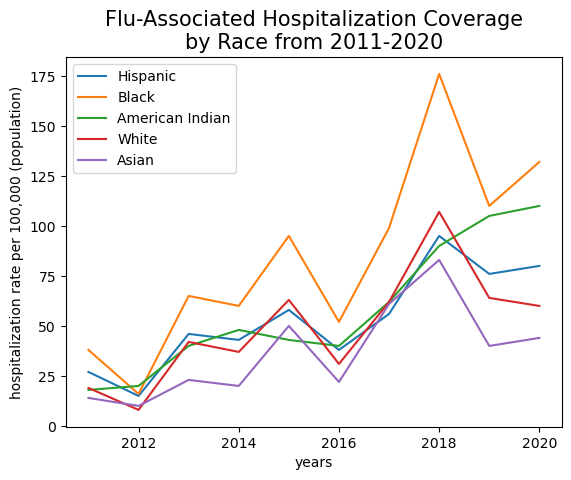

In [14]:
df = pd.read_csv('race_data.csv')
df.set_index('years', inplace=True)
years = list(map(str, range(2011,2021)))

plt.figure(figsize=(10,8))

df.plot(kind='line')

plt.title('Flu-Associated Hospitalization Coverage\nby Race from 2011-2020', fontsize=15)
plt.ylabel('hospitalization rate per 100,000 (population)', fontsize=10)
plt.xlabel('years', fontsize=10)

plt.legend()

plt.savefig('flu_by_race.png')

plt.show()

<a name="four"></a> 
## Flu Vaccine Coverage

Getting the annual flu vaccine is often considered the "first line of defense" against the flu.\
Here we the percentage of vaccination by age from the flu seasons of 2010-11 through 2019-20.

<Figure size 1000x800 with 0 Axes>

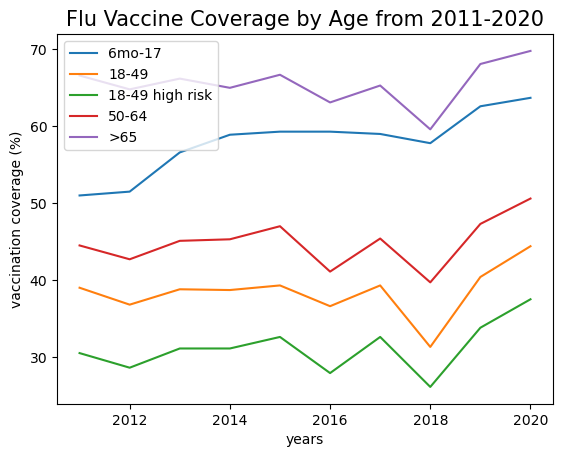

In [15]:
df = pd.read_csv('vaccine_data.csv')
df.set_index('years', inplace=True)
years = list(map(str, range(2011,2021)))

plt.figure(figsize=(10,8))

df.plot(kind='line')

plt.title('Flu Vaccine Coverage by Age from 2011-2020', fontsize=15)
plt.ylabel('vaccination coverage (%)', fontsize=10)
plt.xlabel('years', fontsize=10)

plt.legend()

plt.savefig('vaccination.png')

plt.show()

<a name="five"></a> 
## Flu Pandemic Simulation

Given a population of 331,900,000 unwilling participants (the population of the United States), this simulation\
can predict the rate at which the flu virus can spread as well as the max number of participants that can acquire\
the flu. There are four factors that can affect the morbidity of influenza:
- Vaccination coverage
- Viral reproduction number (viral transmission rate)
- Masking
- Quarantining

WILLKOMMEN! BIENVENUE! WELCOME!

You have had the misfortune of spawning in a world where dying by an unseen pathogen is more common than dying by the sword :(

In this little exercise, we will attempt to simulate an Influenza Pandemic in the United States.
The morbidity of a disease is dependent on numerous factors, but this simulation chooses to simplify reality and uses four different factors:
	- vaccination coverage
	- reproduction number (viral transmission rate)
	- quarantining
	- masking

This simulation will have 331,900,000 "participants" (the population of the U.S.) and will start with 1 "Index Case".
	If you did not know:
	index case = the first identified case in a group of related cases of a particular communicable


I. First off is vaccination coverage. Vaccination is often called the "first line of defense". It allows your immune system to be more prepared for future infections.
   In this simulation, only 50% of those vaccinated will be immune to the flu, in emulation o

   - What percentage of participants do you want vaccinated against the flu? Enter a number from 0-100.	 45



II. Next is reproduction number (viral transmission rate). This is basically the expected number of healthy participants a single diseased individual will infect. Therefore:


    - How many healthy participants do you want your infected participants to infect? Enter a number from 1-10.	 3



III. For a time, masks were everywhere. They serve to protect you and others by reducing the chance of spreading the disease.
     Additionally, some masks will protect you more than others, and that will be taken into account in this simulation. Therefore:


     - How many percent of people wear CLOTH masks? Enter a number from 0-100.		 33
     - How many percent of people wear SURGICAL masks? Enter a number from 1-100.	 25
     - How many percent of people wear N95/KN95 masks? Enter a number from 0-100.	 6



IV. The same as masking, quarantining oneself prevents the spread of disease to others.
    In this simulation if you quarantine yourself, you will not infect anyone and no one will infect you. Therefore:


    - What is the percentage of participants (healthy or infected) that will quarantine themselves? Enter a number from 0-100.	 50




Factors                Amnt of Ppl
---------------------  -------------
max infected ppl       171061259
vaccination coverage   45%
reproduction number    3
cloth mask             33%
surgical mask          25%
respirator (N95/KN95)  6%
quarantine rate        50%


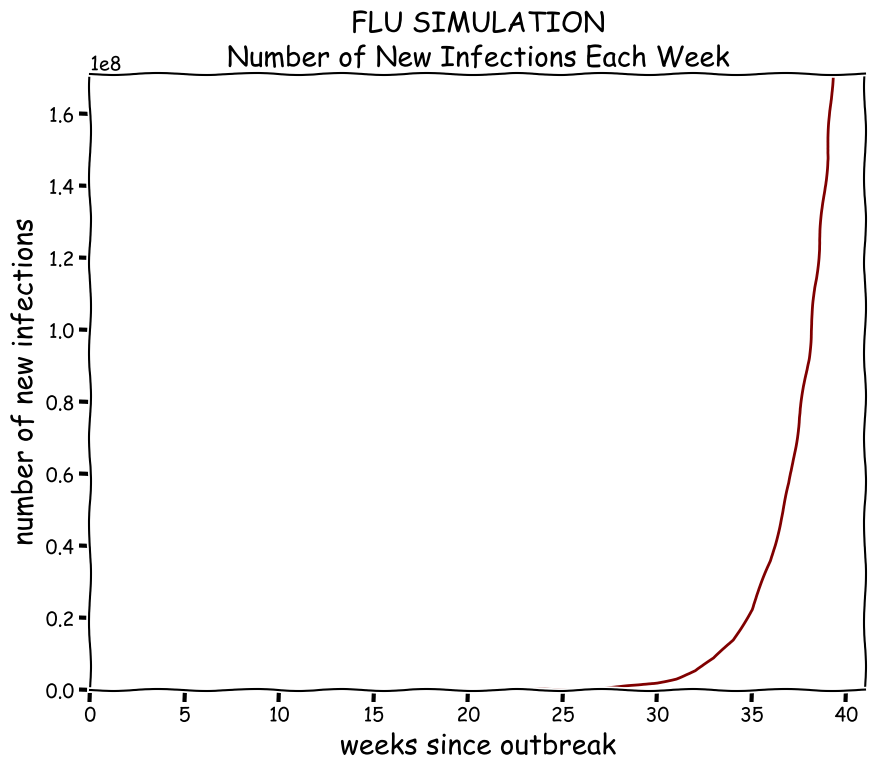

In [16]:
def introduction():
    print('WILLKOMMEN! BIENVENUE! WELCOME!\n')
    print('You have had the misfortune of spawning in a world where dying by an unseen pathogen is more common than dying by the sword :(\n')
    print('In this little exercise, we will attempt to simulate an Influenza Pandemic in the United States.')
    print('The morbidity of a disease is dependent on numerous factors, but this simulation chooses to simplify reality and uses four different factors:')
    print('\t- vaccination coverage'); print('\t- reproduction number (viral transmission rate)'); print('\t- quarantining'); print('\t- masking\n')

def number_of_participants(): 
    print('This simulation will have 331,900,000 "participants" (the population of the U.S.) and will start with 1 "Index Case".')
    print('\tIf you did not know:')
    print('\tindex case = the first identified case in a group of related cases of a particular communicable\n\n')

def vaccination():
    print('I. First off is vaccination coverage. Vaccination is often called the "first line of defense". It allows your immune system to be more prepared for future infections.')
    print('   In this simulation, only 50% of those vaccinated will be immune to the flu, in emulation of CDC statistics of flu vaccine effectiveness. Therefore:')
    global vaccination_rate; vaccination_rate = int(input('   - What percentage of participants do you want vaccinated against the flu? Enter a number from 0-100.\t'))
    vaccinated_people = vaccination_rate / 100 * 331899999
    global effectively_vaccinated_people; effectively_vaccinated_people = vaccinated_people * .5  ## since vaccine is, according to CDC, 50% effective

def transmission():
    print('\nII. Next is reproduction number (viral transmission rate). This is basically the expected number of healthy participants a single diseased individual will infect. Therefore:')
    global infectiousness; infectiousness = int(input('    - How many healthy participants do you want your infected participants to infect? Enter a number from 1-10.\t'))

def masks():
    print('\nIII. For a time, masks were everywhere. They serve to protect you and others by reducing the chance of spreading the disease.')
    print('     Additionally, some masks will protect you more than others, and that will be taken into account in this simulation. Therefore:')
    global cloth_mask; cloth_mask = int(input('     - How many percent of people wear CLOTH masks? Enter a number from 0-100.\t\t'))
    global surgical_mask; surgical_mask = int(input('     - How many percent of people wear SURGICAL masks? Enter a number from 1-100.\t'))
    global respirator; respirator = int(input('     - How many percent of people wear N95/KN95 masks? Enter a number from 0-100.\t'))

def quarantine():
    print('\nIV. The same as masking, quarantining oneself prevents the spread of disease to others.')
    print('    In this simulation if you quarantine yourself, you will not infect anyone and no one will infect you. Therefore:')
    global quarantine_rate; quarantine_rate = int(input('    - What is the percentage of participants (healthy or infected) that will quarantine themselves? Enter a number from 0-100.\t'))
    global non_quarantined_ppl; non_quarantined_ppl = 331899999 - quarantine_rate/100*331899999

def max_infection():
    global max_infected_ppl; max_infected_ppl = non_quarantined_ppl + 0.44*cloth_mask/100*331899999 + 0.34*surgical_mask/100*331899999 + 0.17*respirator/100*331899999 - effectively_vaccinated_people

def infection():
    index_case = 1
    global sick_people; sick_people = []
    while index_case < max_infected_ppl:
        index_case = index_case*infectiousness - 0.56*index_case*cloth_mask/100 - 0.66*index_case*surgical_mask/100 - 0.83*index_case*respirator/100 - index_case
        sick_people.append(index_case)

def table():
    print(tabulate([['max infected ppl', int(max_infected_ppl)], ['vaccination coverage', f'{vaccination_rate}%'],
                    ['reproduction number', infectiousness], ['cloth mask', f'{cloth_mask}%'], 
                    ['surgical mask', f'{surgical_mask}%'], ['respirator (N95/KN95)', f'{respirator}%'],
                    ['quarantine rate', f'{quarantine_rate}%']],headers=['\n\nFactors', '\n\nAmnt of Ppl']))

def plot():
    x = range(len(sick_people))
    y = sick_people
    plt.figure(figsize=(10,8))
    with plt.xkcd():
        plt.plot(x,y,
                 color = 'maroon')
        plt.xlim(0,len(sick_people))
        plt.ylim(0,max_infected_ppl)
        plt.title('FLU SIMULATION\nNumber of New Infections Each Week', fontsize=20)
        plt.ylabel('number of new infections', fontsize=20)
        plt.xlabel('weeks since outbreak', fontsize=20)
        plt.savefig('simulation.png')
    plt.show()

def execute():
    introduction()
    number_of_participants()
    vaccination()
    transmission()
    masks()
    quarantine()
    max_infection()
    infection()
    table()
    plot()  

execute()